## **data preprocessing and EDA**

In [1]:
import pandas as pd
data=pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [2]:
data.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [3]:
print(data.duplicated().sum())

272


In [4]:
data.shape

(1190, 12)

In [5]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


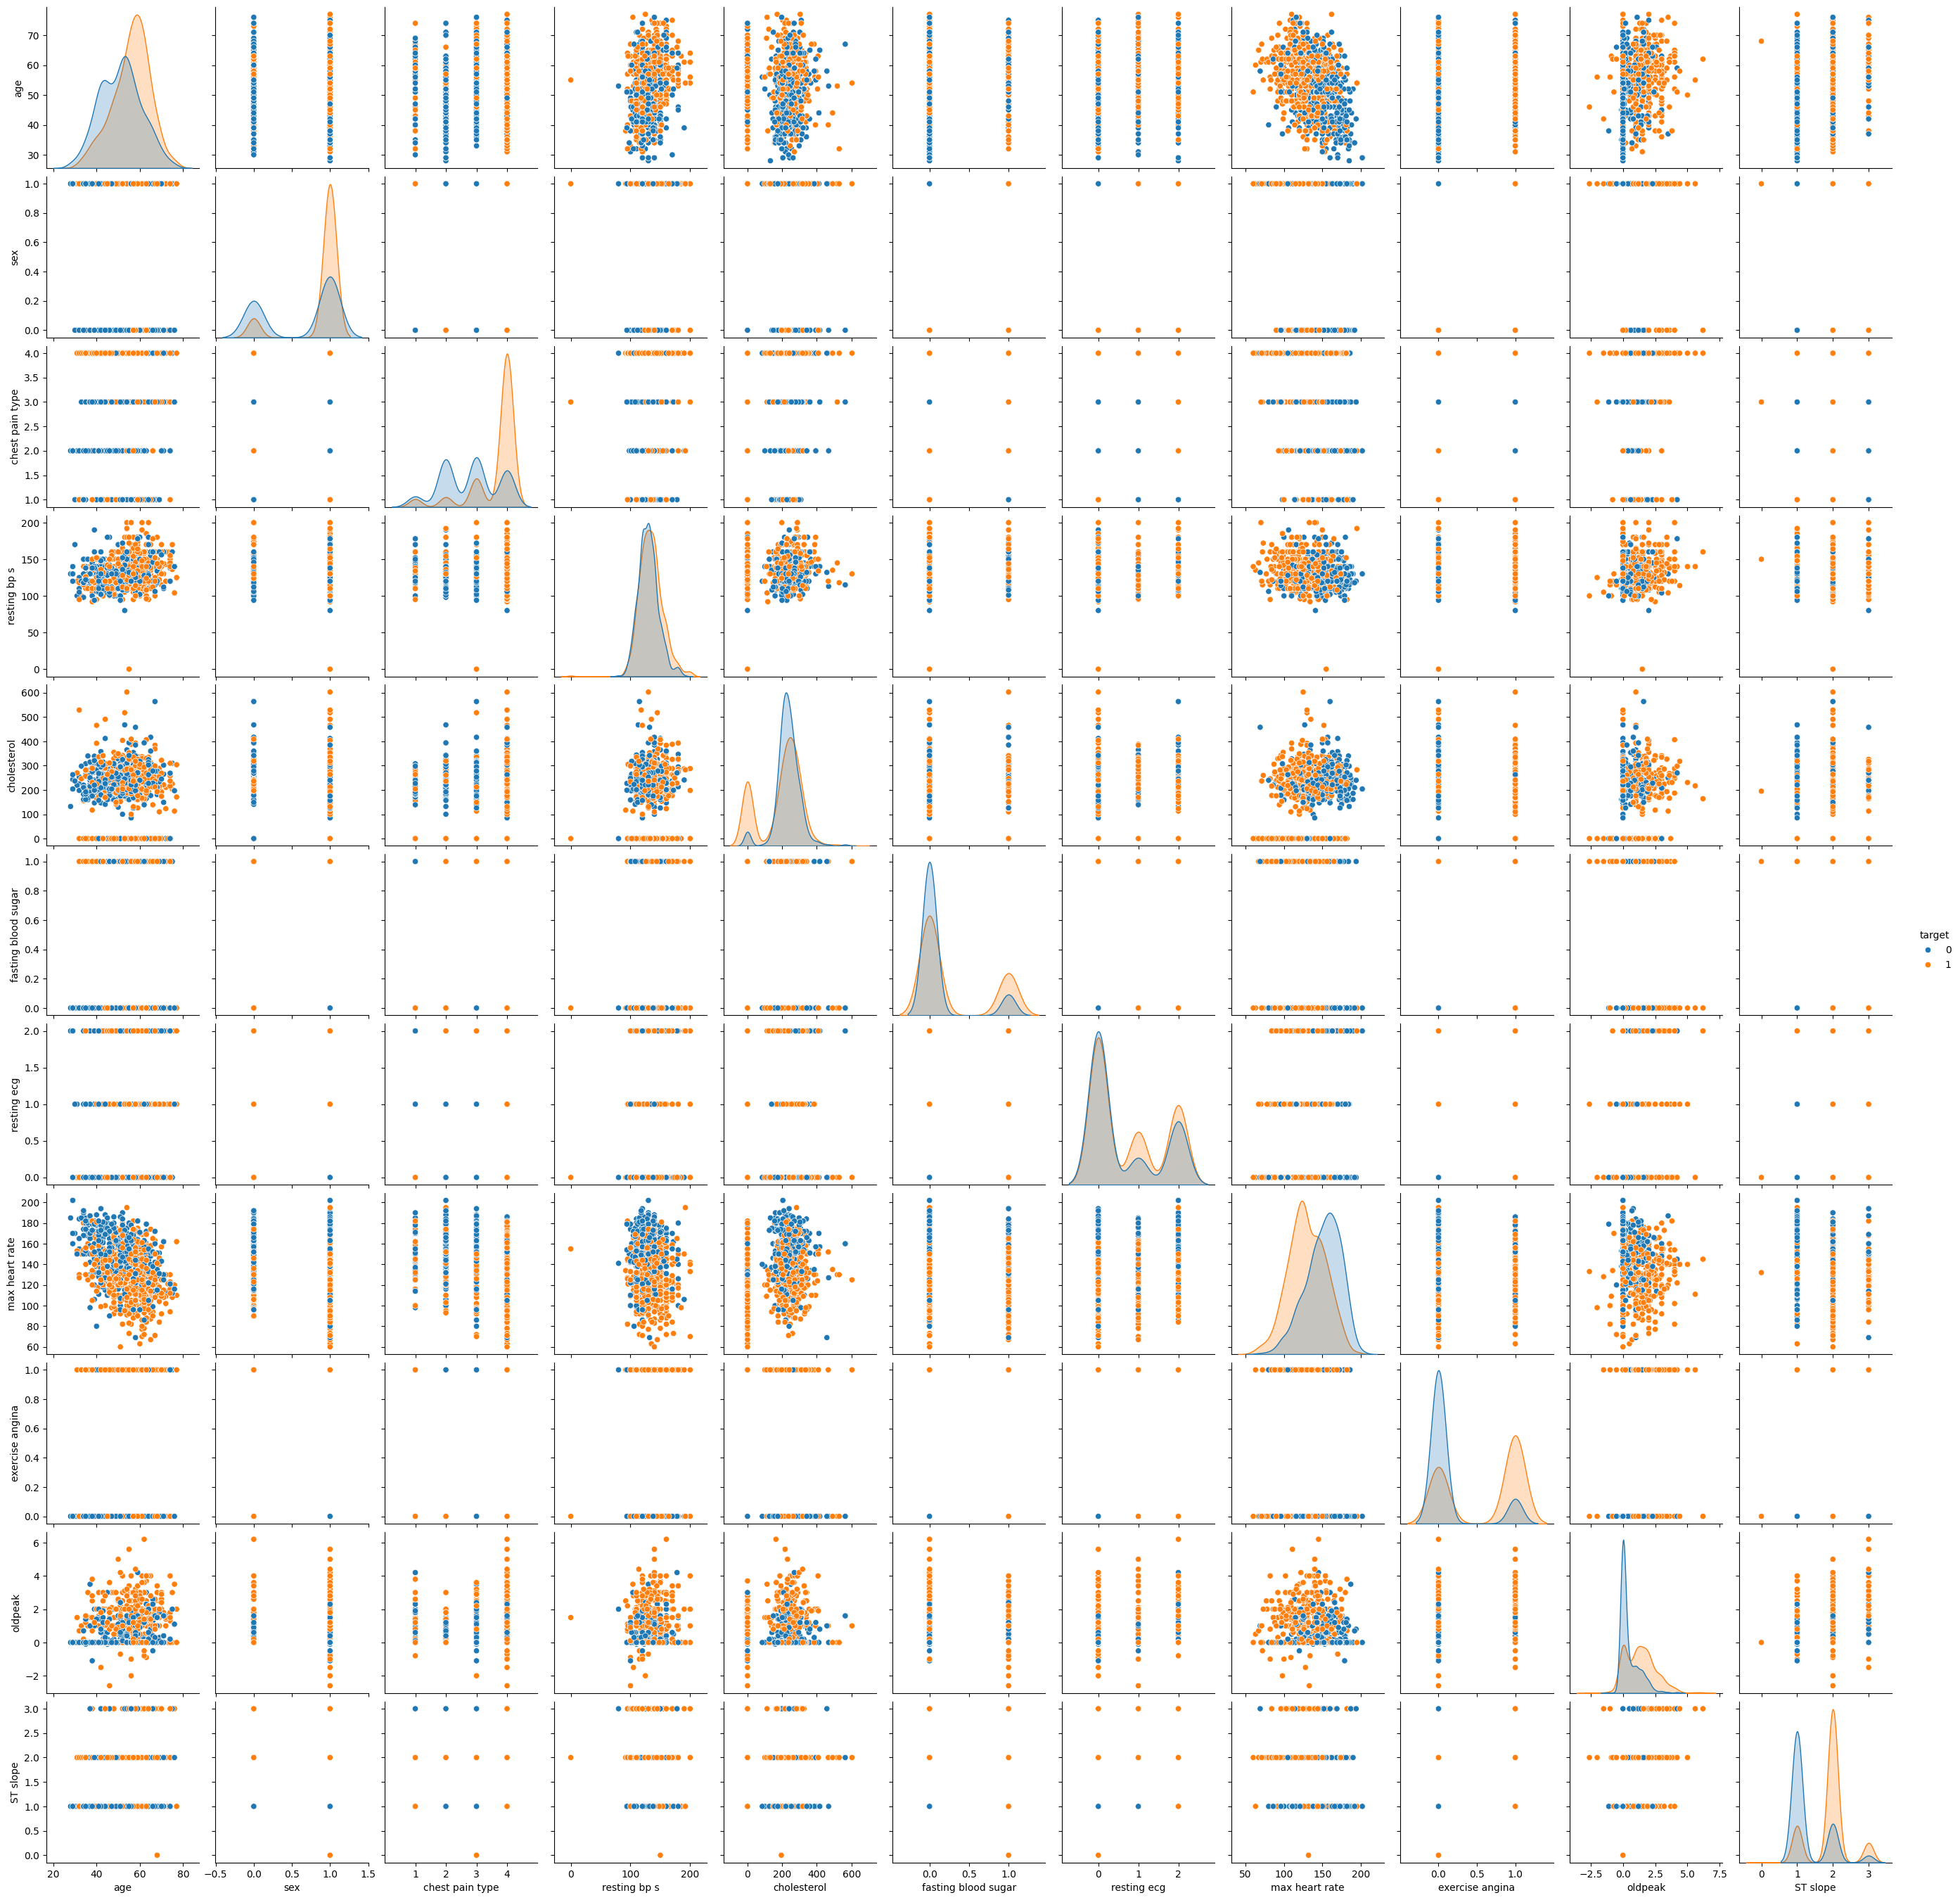

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data,hue='target')
plt.show()

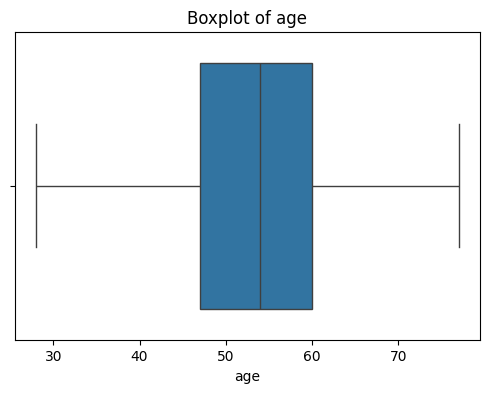

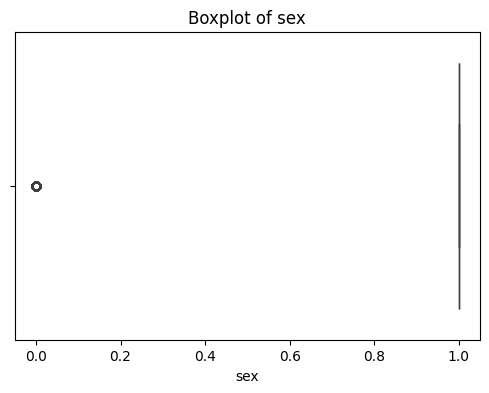

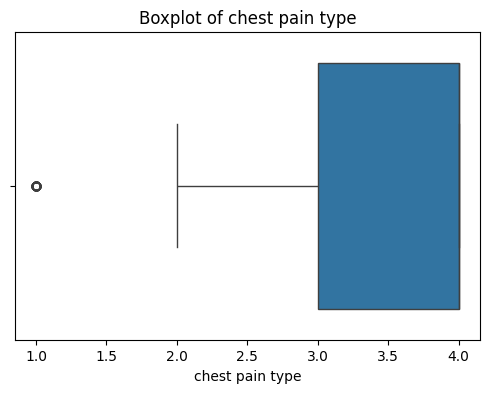

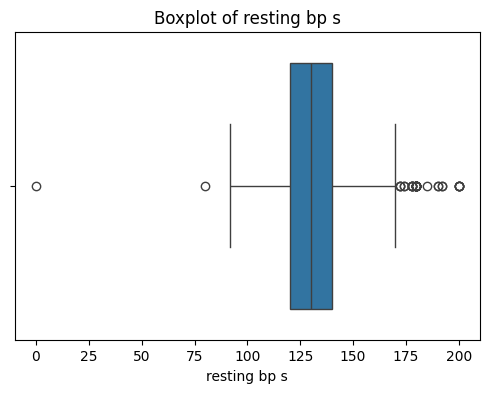

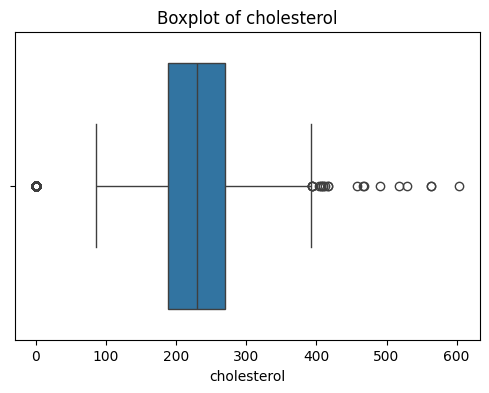

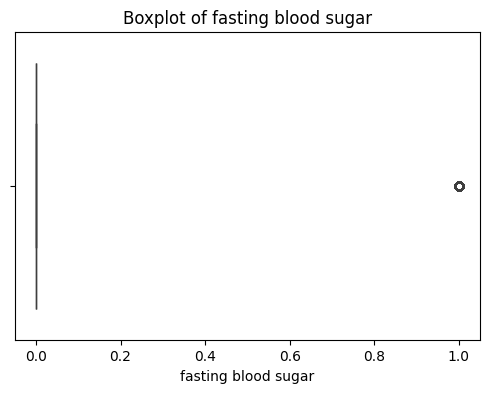

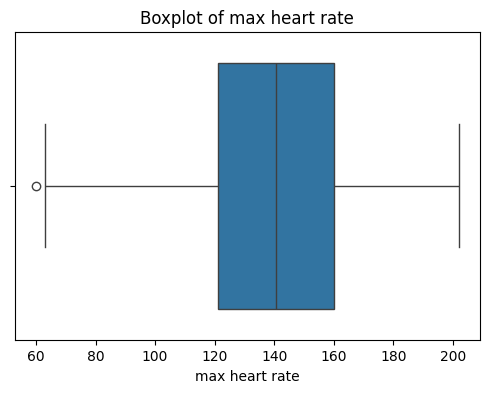

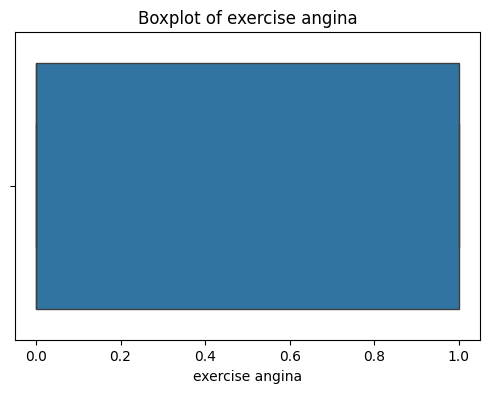

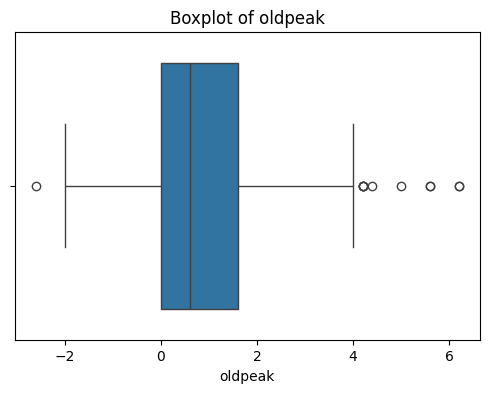

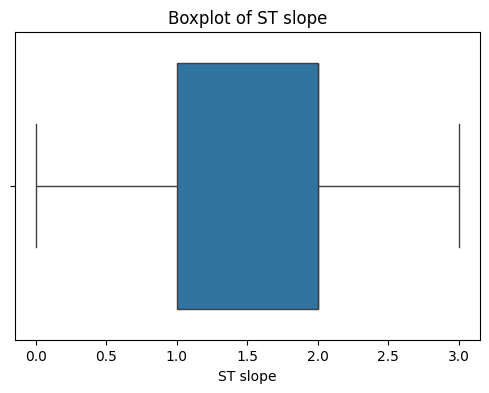

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

exclude_columns = ['target', 'excercise angina', 'resting ecg']
features = data.select_dtypes(include=['number']).columns
numerical_features = features.drop(exclude_columns, errors='ignore')

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [8]:
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers=(data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))
print(outliers.sum())

age                      0
sex                    281
chest pain type         66
resting bp s            37
cholesterol            193
fasting blood sugar    254
max heart rate           1
exercise angina          0
oldpeak                 11
ST slope                 0
dtype: int64


In [9]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

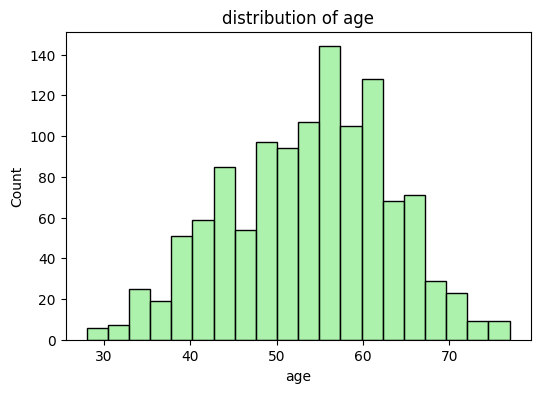

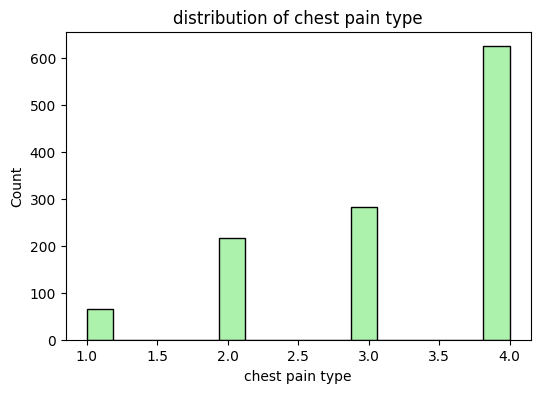

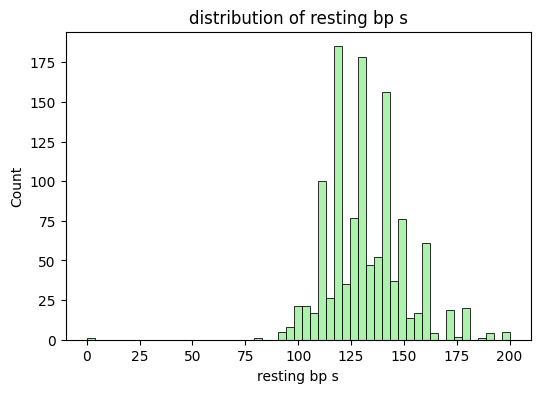

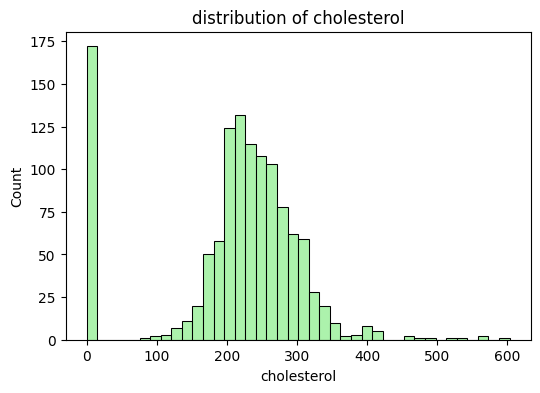

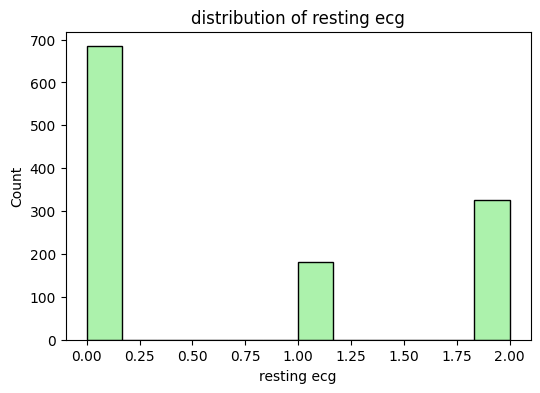

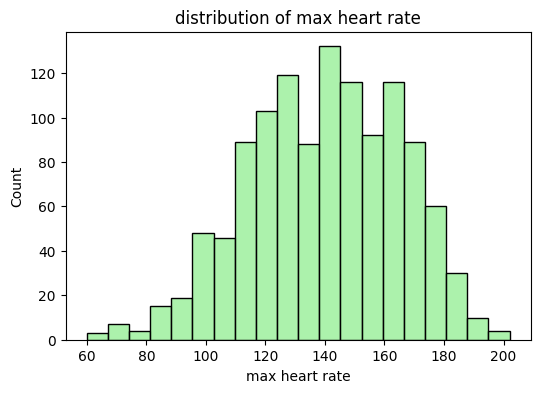

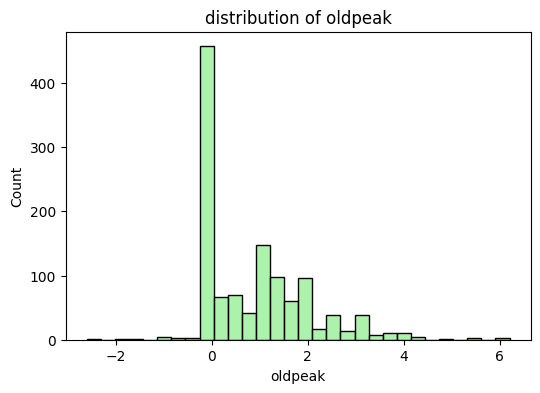

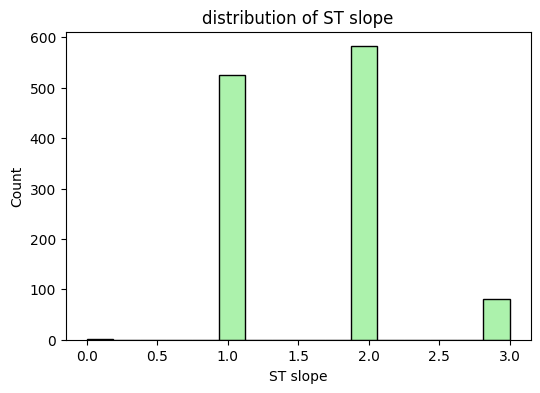

In [10]:
features=['age','chest pain type', 'resting bp s', 'cholesterol', 'resting ecg', 'max heart rate', 'oldpeak', 'ST slope']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=data[feature],color='lightgreen')
    plt.title(f'distribution of {feature}')
    plt.show()

In [11]:
data[features].head()

,age,chest pain type,resting bp s,cholesterol,resting ecg,max heart rate,oldpeak,ST slope
0,40,2,140,289,0,172,0.0,1
1,49,3,160,180,0,156,1.0,2
2,37,2,130,283,1,98,0.0,1
3,48,4,138,214,0,108,1.5,2
4,54,3,150,195,0,122,0.0,1


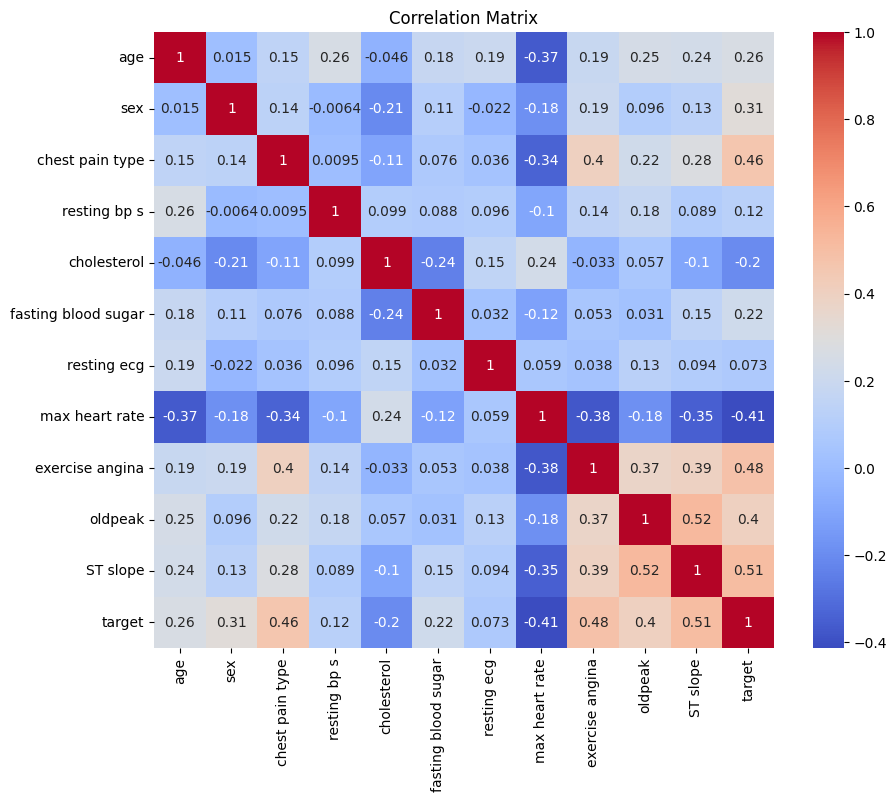

In [12]:
correlation_matrix=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,-1.466728,1,-1.318351,0.427328,0.775674,0,-0.802672,1.265039,0,-0.849792,-1.023217,0
1,-0.504600,0,-0.248932,1.516587,-0.299512,0,-0.802672,0.637758,0,0.071119,0.615583,1
2,-1.787437,1,-1.318351,-0.117301,0.716489,0,0.346762,-1.636136,0,-0.849792,-1.023217,0
3,-0.611503,0,0.820487,0.318402,0.035867,0,-0.802672,-1.244085,1,0.531575,0.615583,1
4,0.029915,1,-0.248932,0.971958,-0.151550,0,-0.802672,-0.695214,0,-0.849792,-1.023217,0


In [14]:
from sklearn.model_selection import train_test_split
X=data.drop('target',axis=1)
y=data['target']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.8613445378151261
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



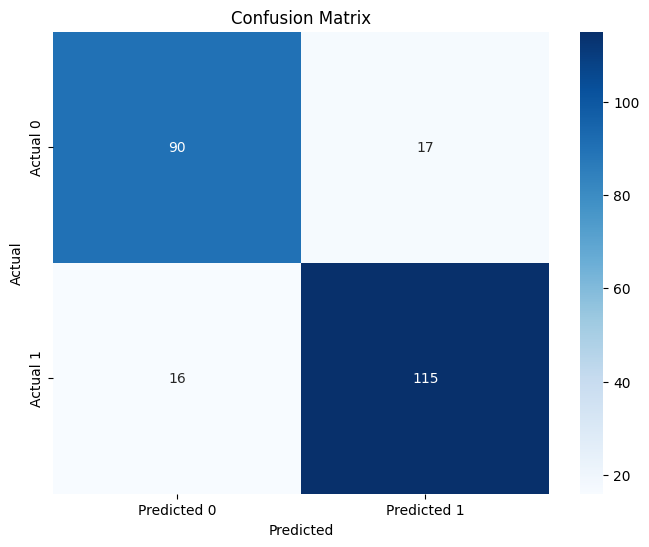

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Tuned Logistic Regression**

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg_tuned = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(logreg_tuned, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation accuracy: 0.8203251584458527


Accuracy of tuned model: 0.8487394957983193
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       107
           1       0.85      0.88      0.86       131

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



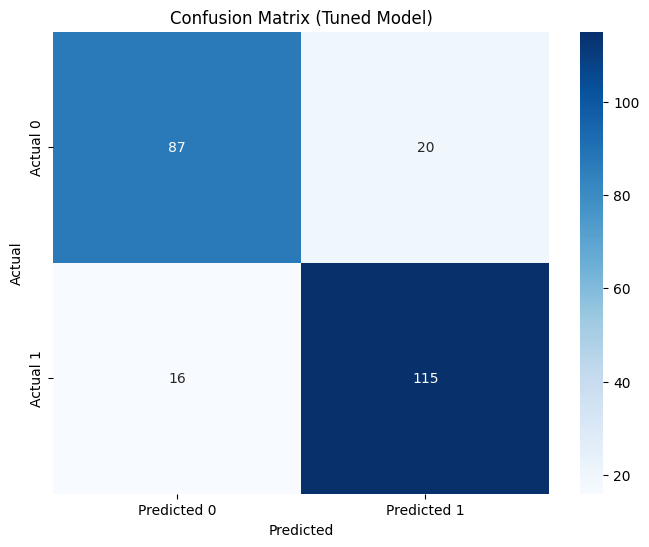

In [19]:
best_logreg_model = grid_search.best_estimator_
y_pred_tuned = best_logreg_model.predict(x_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy of tuned model: {accuracy_tuned}")
print(classification_report(y_test, y_pred_tuned))

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Checking Assumptions**

1- **Linearity**

In [20]:
import statsmodels.api as sm

X_train_with_constant = sm.add_constant(x_train)

model = sm.OLS(y_train, X_train_with_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     80.25
Date:                Thu, 17 Apr 2025   Prob (F-statistic):          5.43e-127
Time:                        20:51:11   Log-Likelihood:                -374.72
No. Observations:                 952   AIC:                             773.4
Df Residuals:                     940   BIC:                             831.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3056    

**2- Normal Distribution of Residuals**

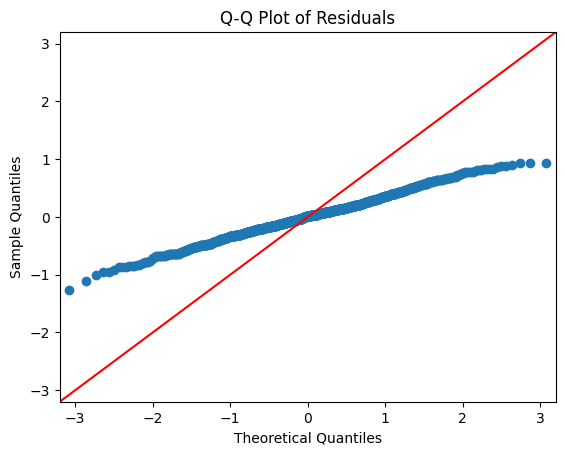

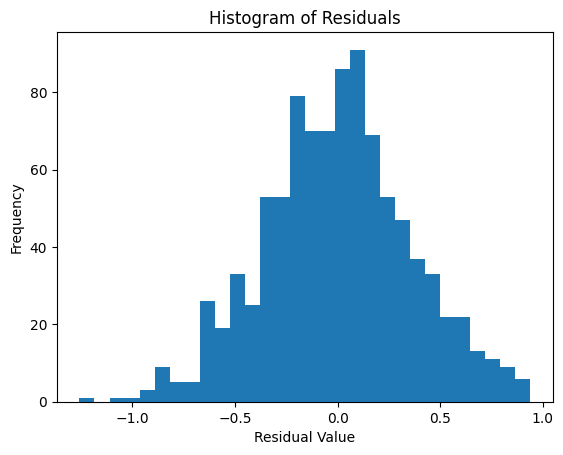

In [21]:
residuals = model.resid

fig = sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

plt.hist(residuals, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

**3- VIF**

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
vif

,VIF Factor,features
0,1.368802,age
1,1.985022,sex
2,1.254951,chest pain type
3,1.152121,resting bp s
4,1.185954,cholesterol
5,1.388427,fasting blood sugar
6,1.093951,resting ecg
7,1.471262,max heart rate
8,2.130906,exercise angina
9,1.512018,oldpeak


**4- Variables correlation**

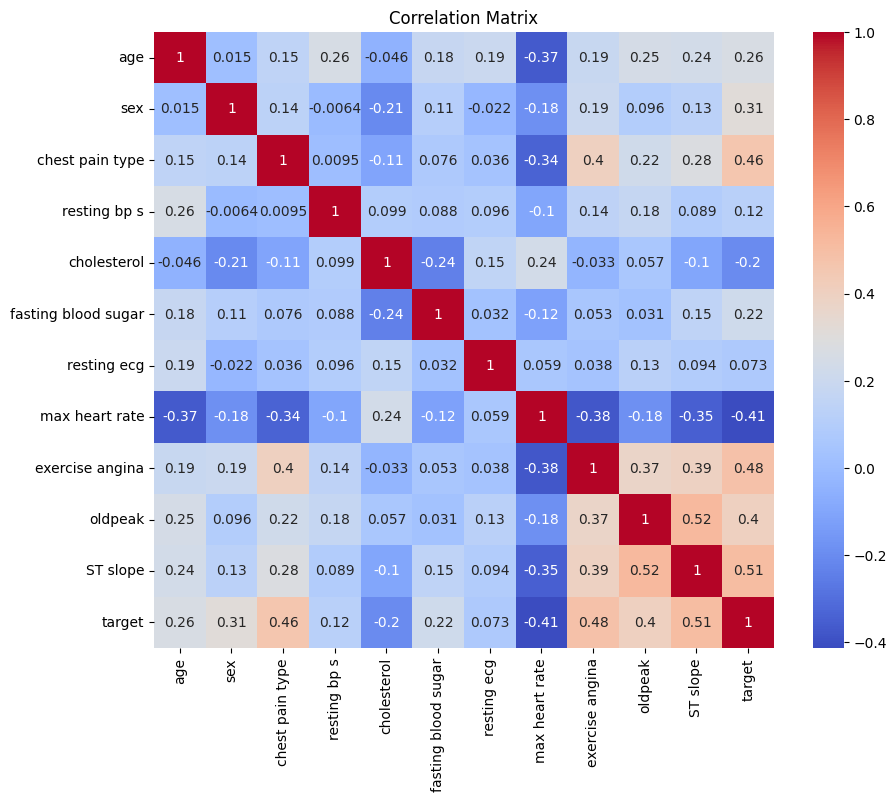

In [24]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**5- GLM**

In [26]:
glm_model = sm.GLM(y_train, X_train_with_constant, family=sm.families.Binomial()).fit()

print(glm_model.summary())

X_test_with_constant = sm.add_constant(x_test)
y_pred_glm = glm_model.predict(X_test_with_constant)

y_pred_glm_class = (y_pred_glm > 0.5).astype(int)

accuracy_glm = accuracy_score(y_test, y_pred_glm_class)
print(f"Accuracy of GLM model: {accuracy_glm}")
print(classification_report(y_test, y_pred_glm_class))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  952
Model:                            GLM   Df Residuals:                      940
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -371.94
Date:                Thu, 17 Apr 2025   Deviance:                       743.87
Time:                        20:57:43   Pearson chi2:                 1.05e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4527
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3266    

# **LOFO**

In [27]:
def lofo_importance(X, y, model=LogisticRegression()):


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    baseline_score = accuracy_score(y_test, model.fit(X_train, y_train).predict(X_test))

    importances = {}
    for col in X.columns:
        X_train_temp = X_train.drop(columns=[col])
        X_test_temp = X_test.drop(columns=[col])

        score = accuracy_score(y_test, model.fit(X_train_temp, y_train).predict(X_test_temp))
        importances[col] = baseline_score - score

    return importances

Feature: age, Importance: 0.008403361344537896
Feature: sex, Importance: 0.021008403361344574
Feature: chest pain type, Importance: 0.02941176470588236
Feature: resting bp s, Importance: 0.0
Feature: cholesterol, Importance: 0.0
Feature: fasting blood sugar, Importance: 0.021008403361344574
Feature: resting ecg, Importance: 0.004201680672269004
Feature: max heart rate, Importance: 0.0
Feature: exercise angina, Importance: 0.037815126050420256
Feature: oldpeak, Importance: 0.008403361344537896
Feature: ST slope, Importance: 0.021008403361344574


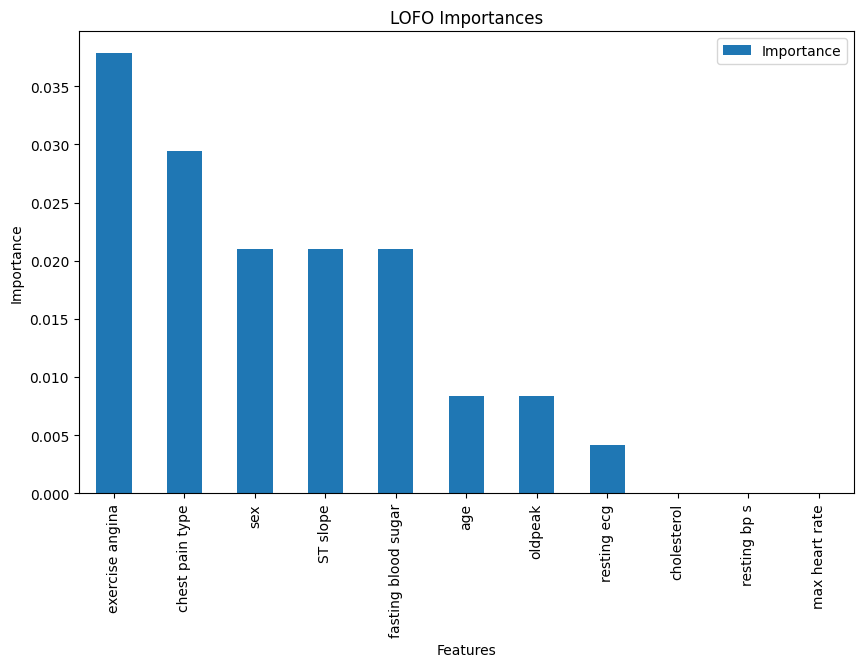

In [28]:
lofo_results = lofo_importance(X, y)

for feature, importance in lofo_results.items():
    print(f"Feature: {feature}, Importance: {importance}")

importance_df = pd.DataFrame.from_dict(lofo_results, orient='index', columns=['Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('LOFO Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()